## Import Libraries

In [262]:
# !pip install wordcloud
# !pip install missingno
# ! pip install ydata-profiling
# !pip install ipywidgets

In [3]:
from wordcloud import WordCloud
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import eda_helper_functions

import missingno as msno

from sklearn.ensemble import IsolationForest




## Read the Training  Data

In [5]:
file_path = r"E:\FLIGHT PREDICTION PROJECT\DATA\my_data\train_data.csv"

train = pd.read_csv(file_path)
train


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...
6690,Jet Airways,2019-03-21,Delhi,Cochin,10:45:00,18:50:00,1925,2.0,No Info,11093
6691,Air India,2019-05-01,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8891
6692,Jet Airways,2019-06-01,Delhi,Cochin,14:00:00,19:00:00,300,1.0,In-flight meal not included,10262
6693,Air Asia,2019-06-24,Delhi,Cochin,07:55:00,13:25:00,330,1.0,No Info,6152


In [6]:
# we check the data types are valid or not
train.dtypes



airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [7]:
# train['date_of_journey'] = pd.to_datetime(train['date_of_journey'])

In [8]:
# another method to convert data type
# train[['date_of_journey','dep_time','arrival_time']] = train[['date_of_journey','dep_time','arrival_time']].apply(pd.to_datetime)

In [9]:
train.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [10]:
# this shows date_of_journy,dep_time and arrival_time columns data type are not valid
# so we convert the data types into date time data type
train = train.assign(**{
    col:pd.to_datetime(train.loc[:,col],dayfirst = True)
    for col in ['date_of_journey','dep_time','arrival_time']
})
train.dtypes

C:\Users\Moavia computer\AppData\Local\Temp\ipykernel_12576\1394680086.py:4: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  col:pd.to_datetime(train.loc[:,col],dayfirst = True)
C:\Users\Moavia computer\AppData\Local\Temp\ipykernel_12576\1394680086.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col:pd.to_datetime(train.loc[:,col],dayfirst = True)
C:\Users\Moavia computer\AppData\Local\Temp\ipykernel_12576\1394680086.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  col:pd.to_datetime(train.loc[:,col],dayfirst = True)


airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

## Summary of Data

In [12]:
# we use info method to get high level summary of data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [13]:
# we use describe method to view the statiscal analysis of numeric columns
train.describe()

,date_of_journey,dep_time,arrival_time,duration,total_stops,price
count,6695,6695,6695,6695.000000,6694.000000,6695.000000
mean,2019-05-04 13:37:45.392083968,2024-07-10 12:54:44.809559040,2024-07-10 13:45:48.080657408,633.489171,0.801464,9030.965646
min,2019-03-01 00:00:00,2024-07-10 00:20:00,2024-07-10 00:05:00,75.000000,0.000000,1759.000000
25%,2019-03-27 00:00:00,2024-07-10 08:00:00,2024-07-10 08:45:00,170.000000,0.000000,5224.000000
50%,2019-05-15 00:00:00,2024-07-10 11:45:00,2024-07-10 14:05:00,510.000000,1.000000,8283.000000
75%,2019-06-03 00:00:00,2024-07-10 18:15:00,2024-07-10 19:15:00,922.500000,1.000000,12373.000000
max,2019-06-27 00:00:00,2024-07-10 23:55:00,2024-07-10 23:55:00,2860.000000,3.000000,62427.000000
std,NaN,NaN,NaN,503.006311,0.659737,4639.522857


In [14]:
# now we check categorical columns

train.describe(include='O')

,airline,source,destination,additional_info
count,6695,6695,6695,6695
unique,12,5,6,7
top,Jet Airways,Delhi,Cochin,No Info
freq,2386,2730,2730,5249


In [15]:
# total_stops column is also a categorical column so we give the summary 
(
    train
    .assign(total_stops=train.total_stops.astype(object))
    .describe(include='O')
)

,airline,source,destination,total_stops,additional_info
count,6695,6695,6695,6694.0,6695
unique,12,5,6,4.0,7
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2386,2730,2730,3580.0,5249


 ## Analysis of Missing Values 

In [17]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,
total_stops,1,0.014937


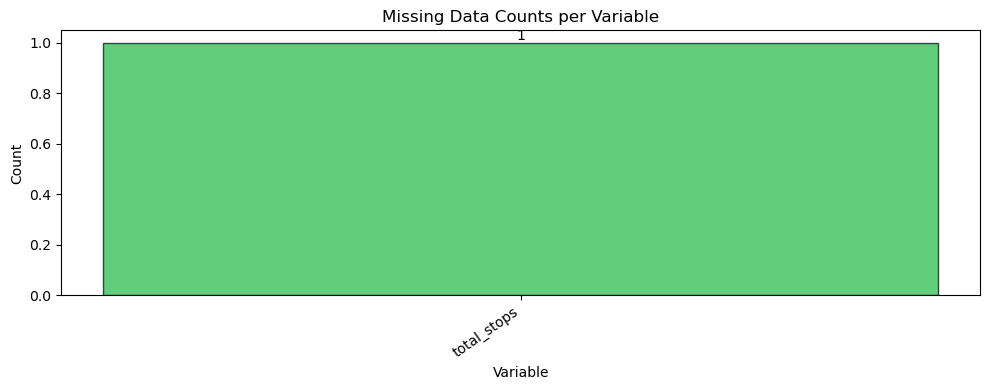

In [18]:
eda_helper_functions.plot_missing_info(train)

<Axes: >

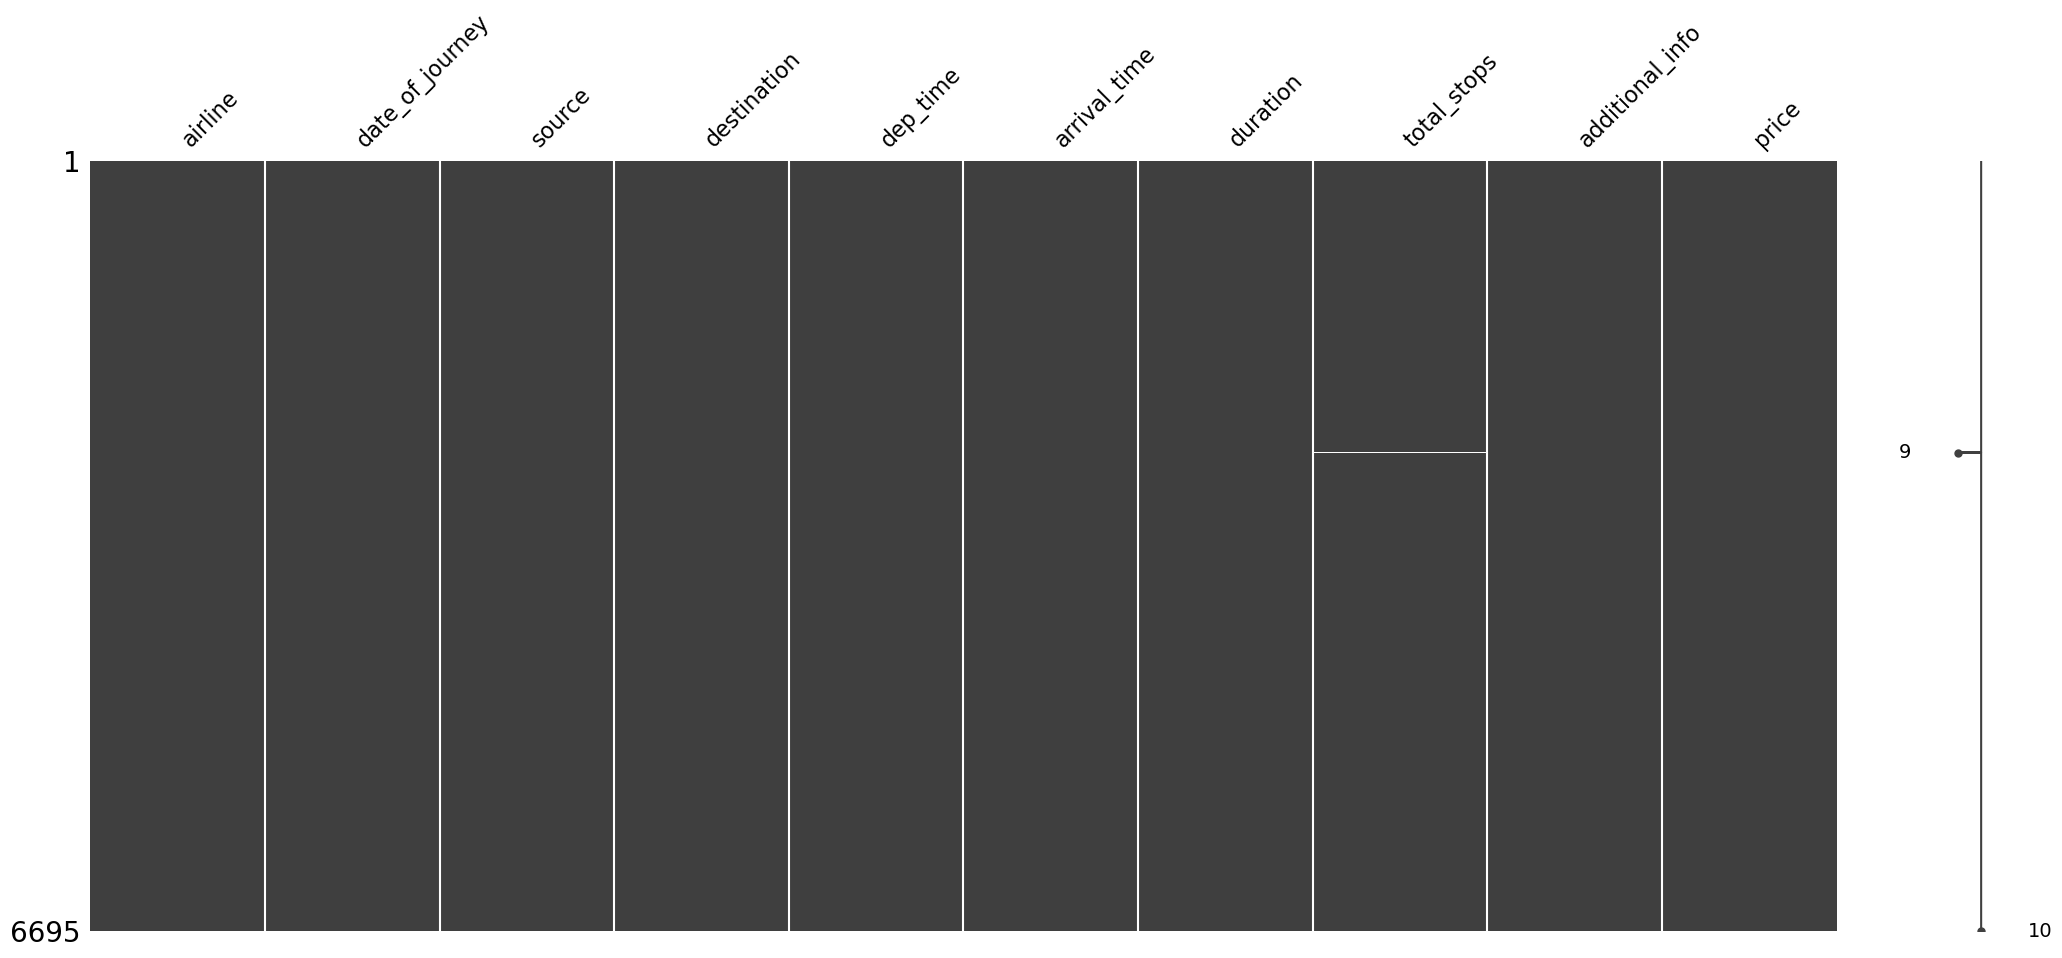

In [19]:
# we use missing no library to view missing values
msno.matrix(train)

<Axes: >

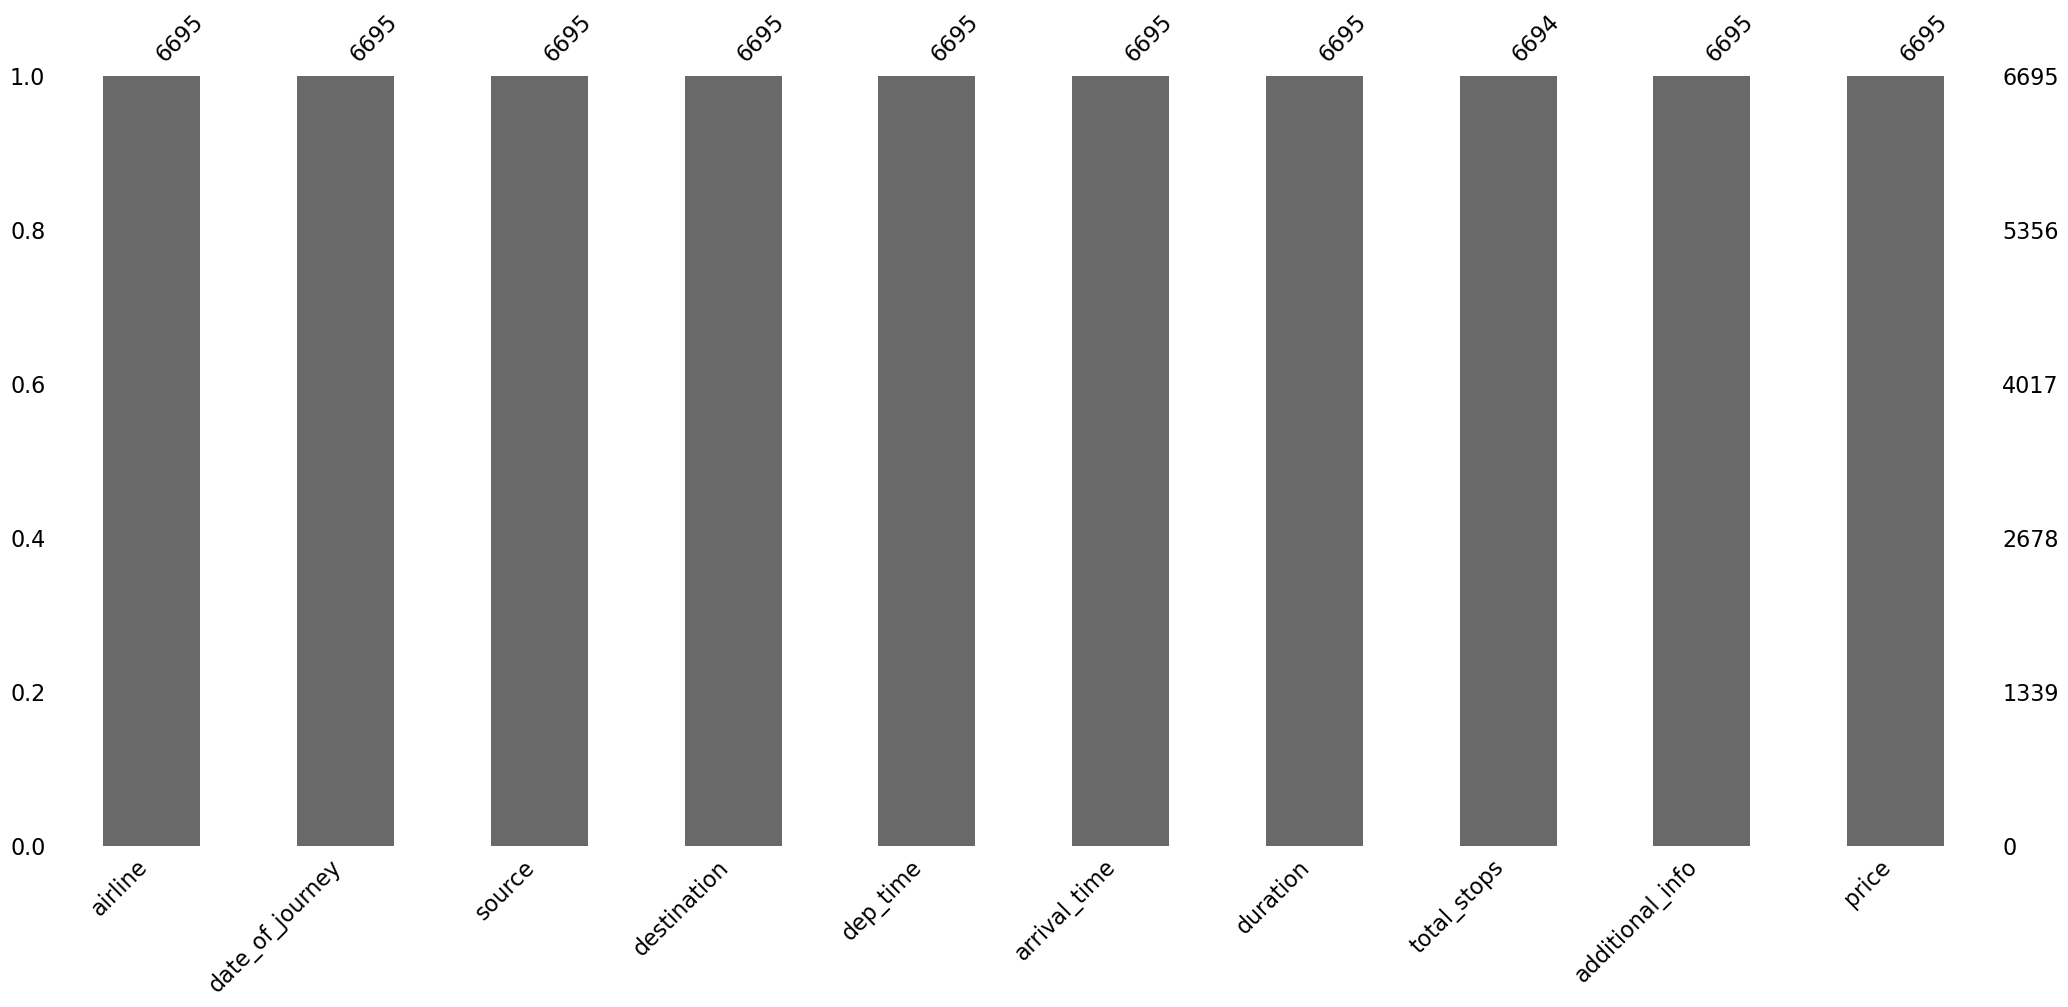

In [20]:
msno.bar(train)

## Analysis of Outliers

In [22]:
train.total_stops.fillna(0,inplace=True)

C:\Users\Moavia computer\AppData\Local\Temp\ipykernel_12576\2473259550.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train.total_stops.fillna(0,inplace=True)


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6695 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [24]:
# we isolation algorithm for outlier detection
# we initialize the isoaltion algorithm with forest

forest = IsolationForest(n_estimators = 10,random_state=42)


In [25]:
# Now we add a new column to check columns are outlier or not
(
    train
    .assign(outlier = forest.fit_predict(train
                                         .drop(columns = 'price')
                                         .select_dtypes(include = 'number')))
#     Now we filter the data
    .query('outlier == -1')
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
5,Jet Airways,2019-04-21,Banglore,Delhi,2024-07-10 18:55:00,2024-07-10 22:00:00,185,0.0,In-flight meal not included,4544,-1
7,Spicejet,2019-06-15,Mumbai,Hyderabad,2024-07-10 05:45:00,2024-07-10 07:15:00,90,0.0,No check-in baggage included,2647,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,2024-07-10 23:05:00,2024-07-10 04:25:00,1760,2.0,No Info,15129,-1
10,Jet Airways,2019-06-12,Kolkata,Banglore,2024-07-10 14:05:00,2024-07-10 10:05:00,1200,1.0,No Info,13044,-1
12,Jet Airways,2019-06-24,Delhi,Cochin,2024-07-10 21:25:00,2024-07-10 19:00:00,1295,2.0,No Info,13292,-1
...,...,...,...,...,...,...,...,...,...,...,...
6687,Air India,2019-06-06,Kolkata,Banglore,2024-07-10 05:50:00,2024-07-10 08:55:00,1625,2.0,No Info,12723,-1
6688,Jet Airways,2019-06-15,Delhi,Cochin,2024-07-10 21:25:00,2024-07-10 12:35:00,910,2.0,In-flight meal not included,9905,-1
6689,Indigo,2019-03-03,Mumbai,Hyderabad,2024-07-10 09:10:00,2024-07-10 10:40:00,90,0.0,No Info,5755,-1
6690,Jet Airways,2019-03-21,Delhi,Cochin,2024-07-10 10:45:00,2024-07-10 18:50:00,1925,2.0,No Info,11093,-1


## Pair Plots

`Pair Plots gives us good understanding of numric values`

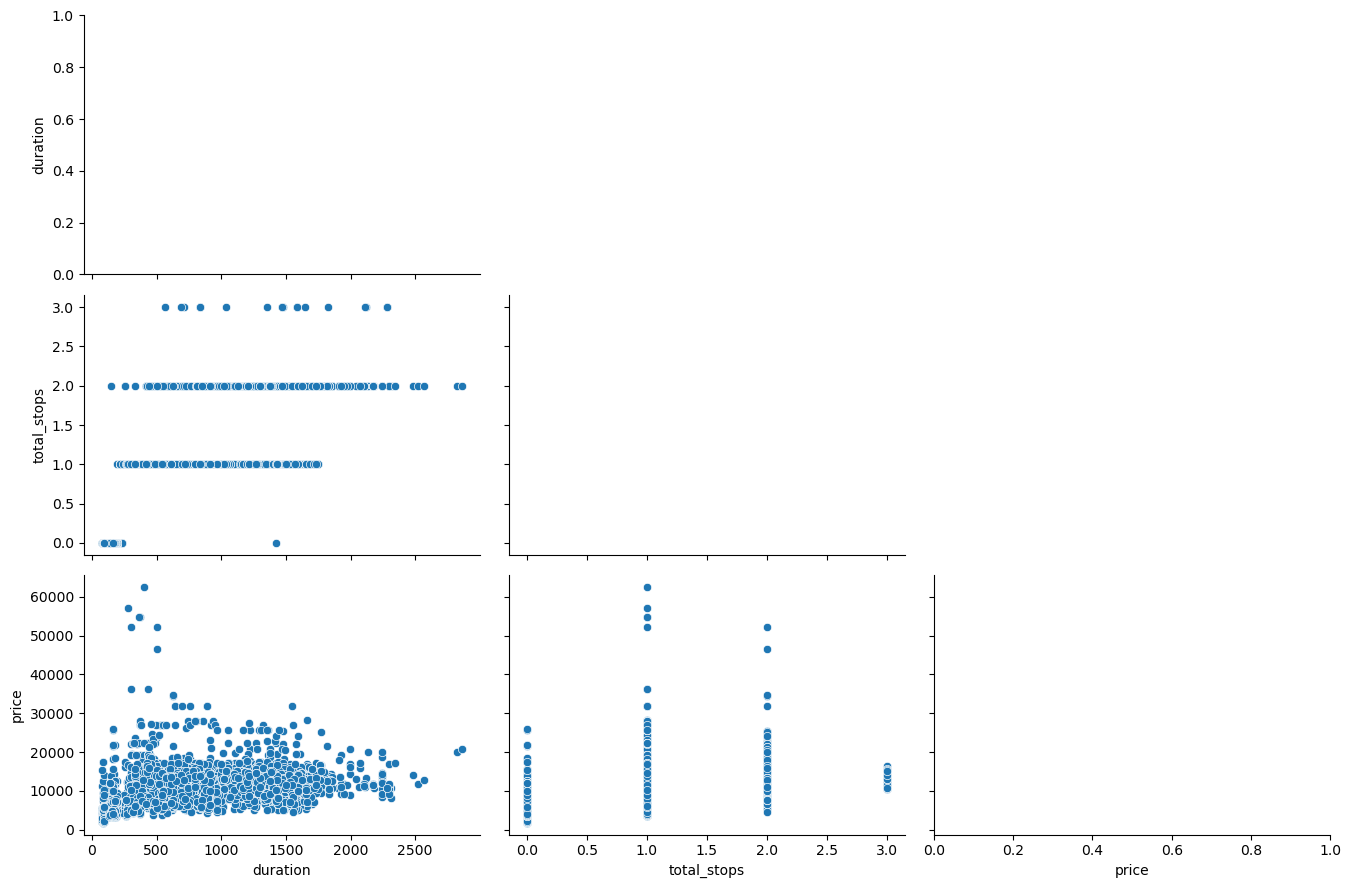

In [27]:
eda_helper_functions.pair_plots(train)

In [28]:
# another method to plot pair plot
# sns.pairplot(train)

## Correlation Analysis

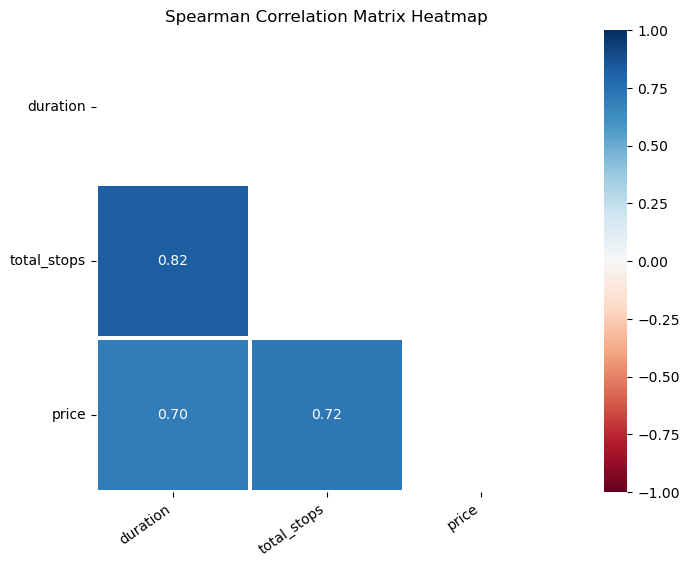

In [30]:
eda_helper_functions.correlation_heatmap(train)

## Now e check the categorical columns

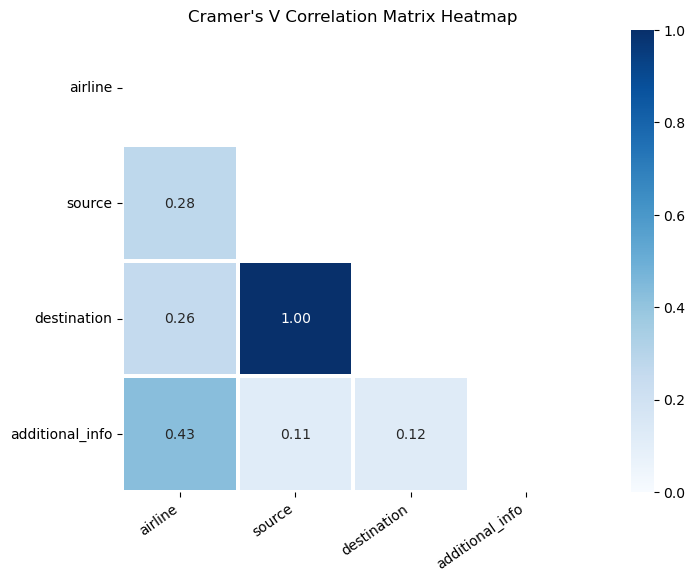

In [32]:
eda_helper_functions.cramersV_heatmap(train)

## Deatailed Analysis

`Now we perform analysis column by column`

In [34]:
train.columns

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

## airline column

In [36]:
# first we call the airline column and chek it data type
# airline column is categorical column
train.airline

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6695, dtype: object

In [37]:
# now we call the eda helper function
eda_helper_functions.cat_summary(train,'airline')

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 12 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,12
top,Jet Airways
freq,2386


,count,percentage
category,,
Jet Airways,2386,0.356385
Indigo,1296,0.193577
Air India,1076,0.160717
Multiple Carriers,730,0.109037
Spicejet,537,0.080209
Vistara,319,0.047647
Air Asia,211,0.031516
Goair,125,0.018671
Multiple Carriers,6,0.000896


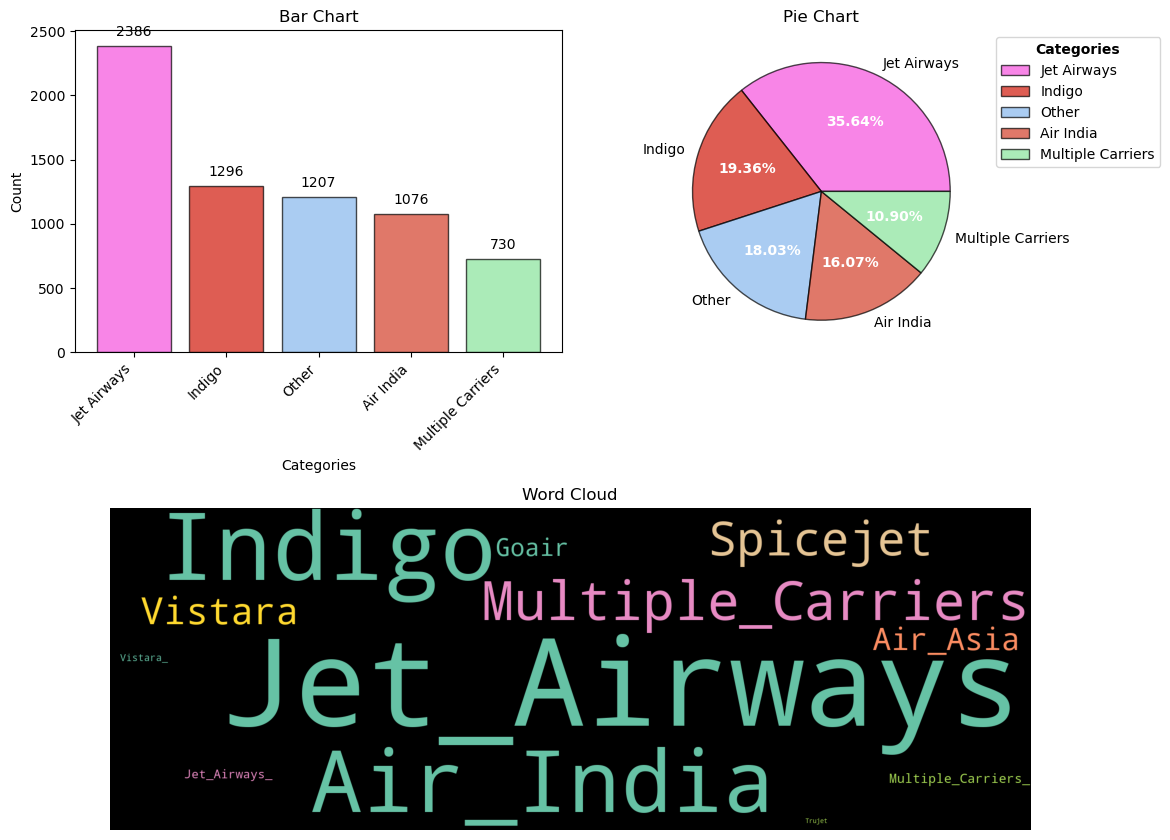

In [38]:
# Now we plot the information of airline column
eda_helper_functions.cat_univar_plots(train,'airline',k=4)

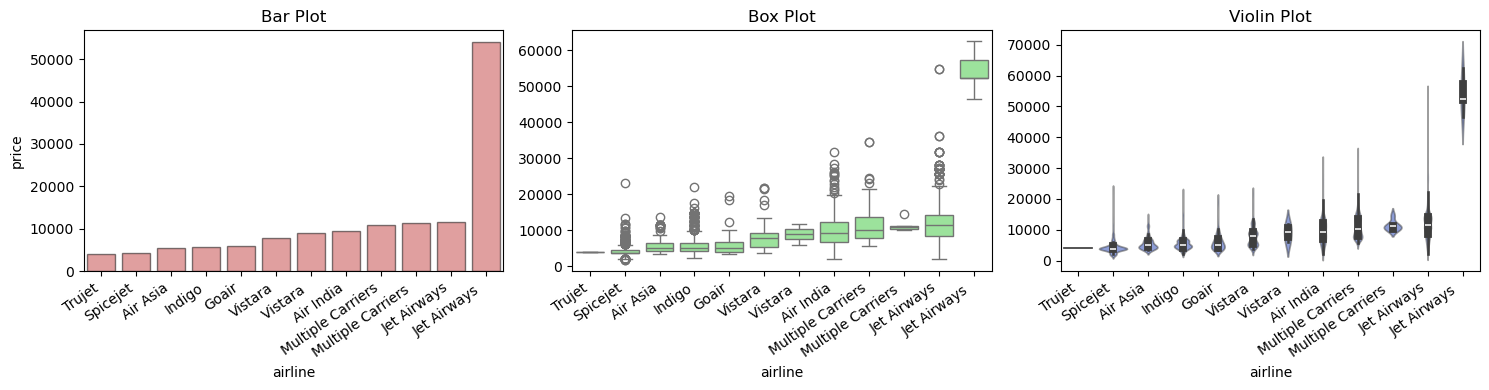

In [39]:
# No e perform bivariate analysis 
eda_helper_functions.num_cat_bivar_plots(
    data = train,
    num_var = 'price',
    cat_var = 'airline'
)

In [40]:
# No e perform Hypothesis testing of airline column
eda_helper_functions.num_cat_hyp_testing(train,'price','airline')


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 447.19740641380713
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3137.9739520926496
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


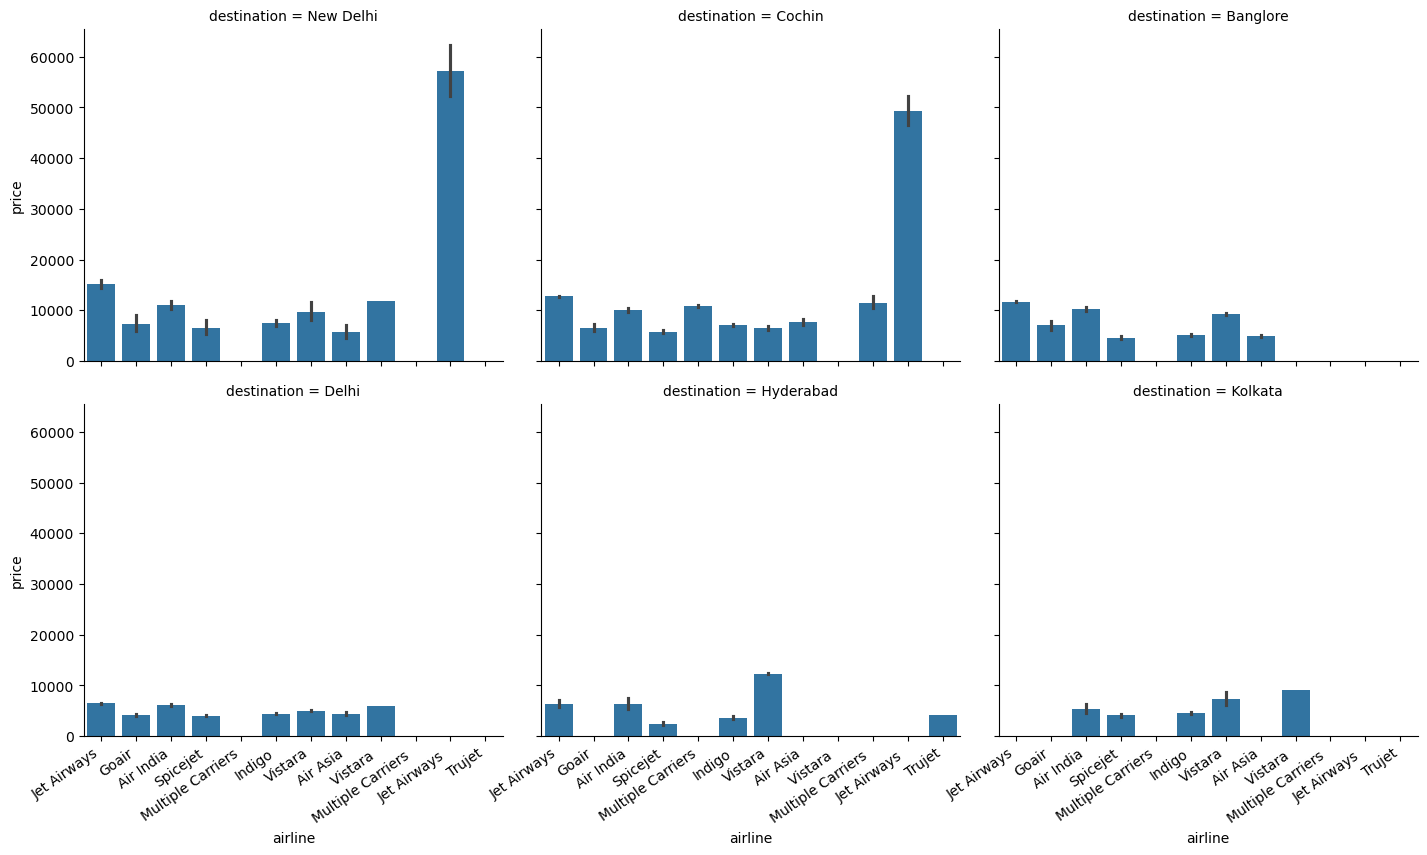

In [41]:
airline_grid = sns.FacetGrid(
    data = train,
    col = 'destination',
    col_wrap = 3,
    height = 4,
    aspect = 1.2
)
airline_grid.map(sns.barplot,'airline','price',order = train.airline.unique())
for ax in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(ax)

## date_of_journey column

In [43]:
train.date_of_journey

0      2019-03-21
1      2019-03-27
2      2019-03-09
3      2019-06-12
4      2019-03-12
          ...    
6690   2019-03-21
6691   2019-05-01
6692   2019-06-01
6693   2019-06-24
6694   2019-03-01
Name: date_of_journey, Length: 6695, dtype: datetime64[ns]

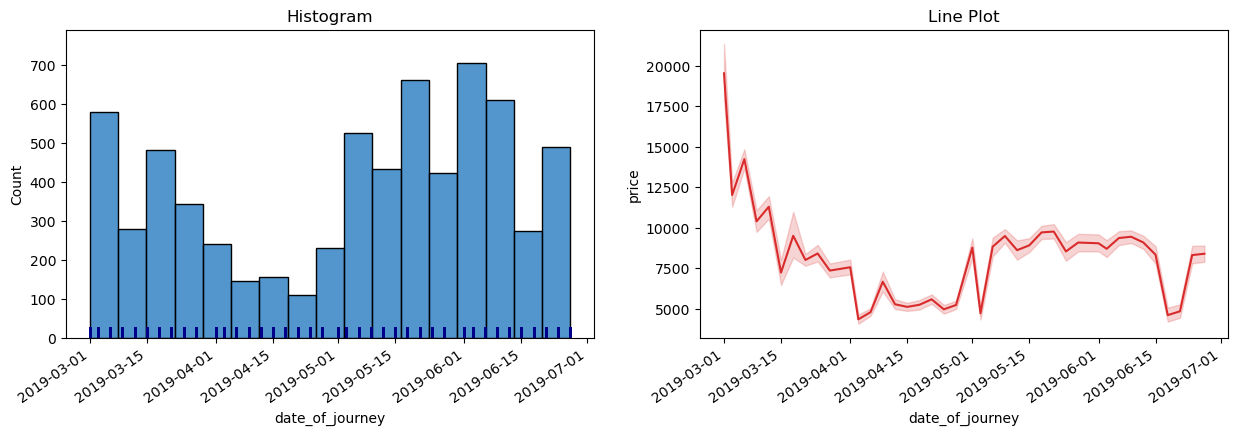

In [44]:
eda_helper_functions.dt_univar_plots(
    data = train,
    var = 'date_of_journey',
    target = 'price'
)

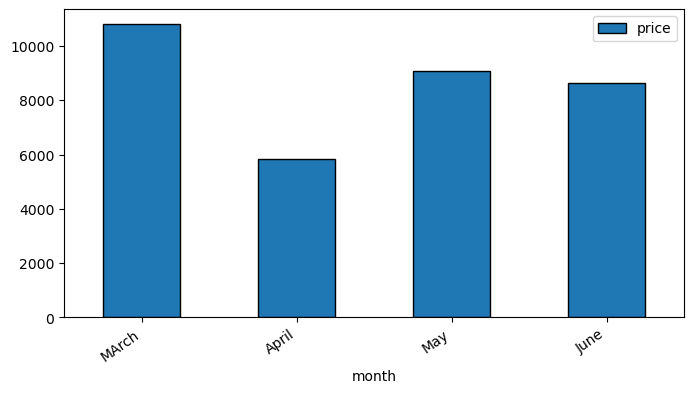

In [45]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey',freq='M'))
    .price.mean()
    .to_frame()
    .set_axis(['MArch','April','May','June'],axis=0)
    .rename_axis(index='month')
    .plot(
        kind='bar',
        figsize = (8,4),
        edgecolor = 'black'
    )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

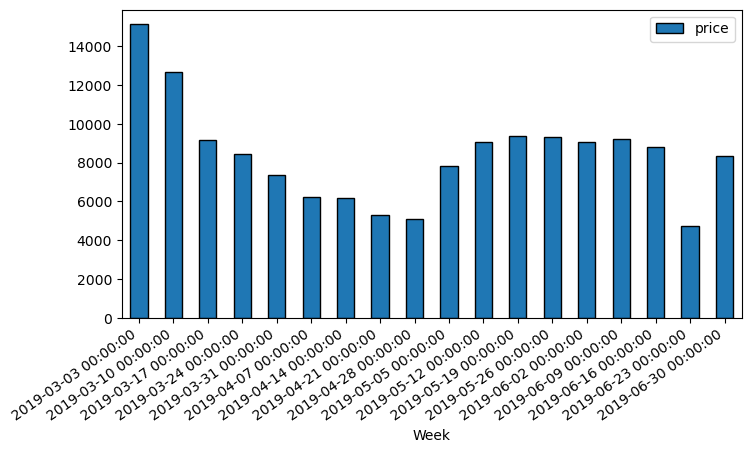

In [46]:
(
    train
    .groupby(pd.Grouper(key='date_of_journey',freq='W'))
    .price.mean()
    .to_frame()
    # .set_axis(['MArch','April','May','June'],axis=0)
    .rename_axis(index='Week')
    .plot(
        kind='bar',
        figsize = (8,4),
        edgecolor = 'black'
    )
)
ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

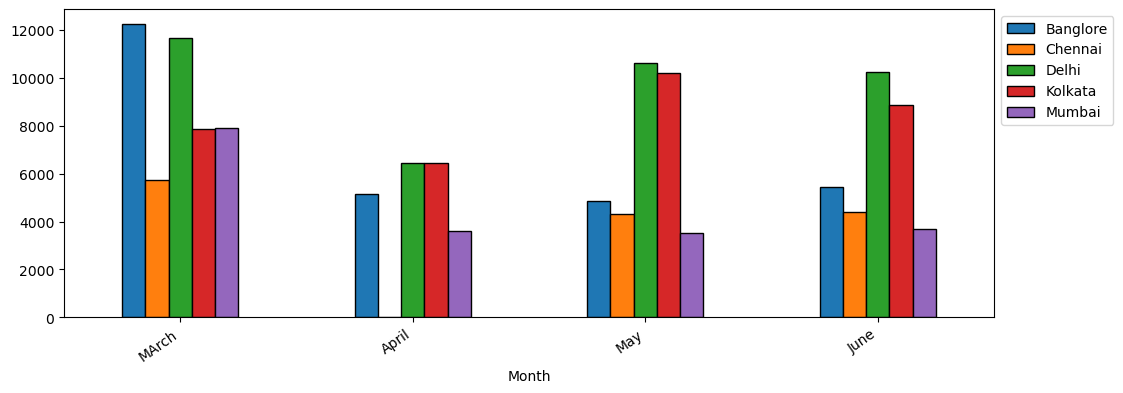

In [144]:
(
    train
    .groupby([pd.Grouper(key='date_of_journey',freq='M'),'source'])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(['MArch','April','May','June'],axis=0)
    .rename_axis(index='Month')
    .plot(
        kind='bar',
        figsize = (12,4),
        edgecolor = 'black'
    )
    
)
ax = plt.gca()
ax.legend(
    loc = 'upper left',
    bbox_to_anchor =(1,1)
)

eda_helper_functions.rotate_xlabels(ax)

## dep_time column

In [146]:
train.dep_time

0      2024-07-10 08:55:00
1      2024-07-10 17:30:00
2      2024-07-10 11:40:00
3      2024-07-10 09:25:00
4      2024-07-10 22:55:00
               ...        
6690   2024-07-10 10:45:00
6691   2024-07-10 09:25:00
6692   2024-07-10 14:00:00
6693   2024-07-10 07:55:00
6694   2024-07-10 11:50:00
Name: dep_time, Length: 6695, dtype: datetime64[ns]

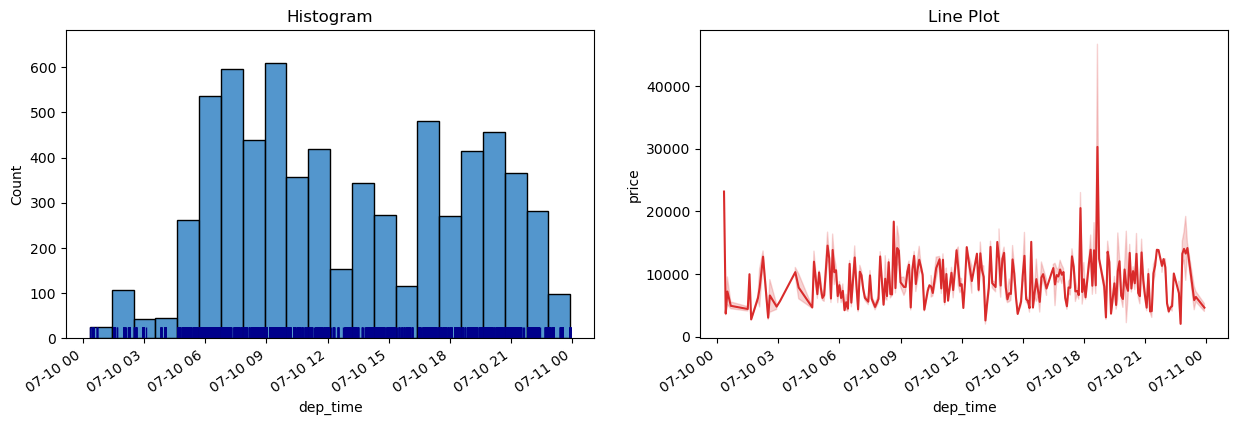

In [148]:
eda_helper_functions.dt_univar_plots(train,'dep_time','price')

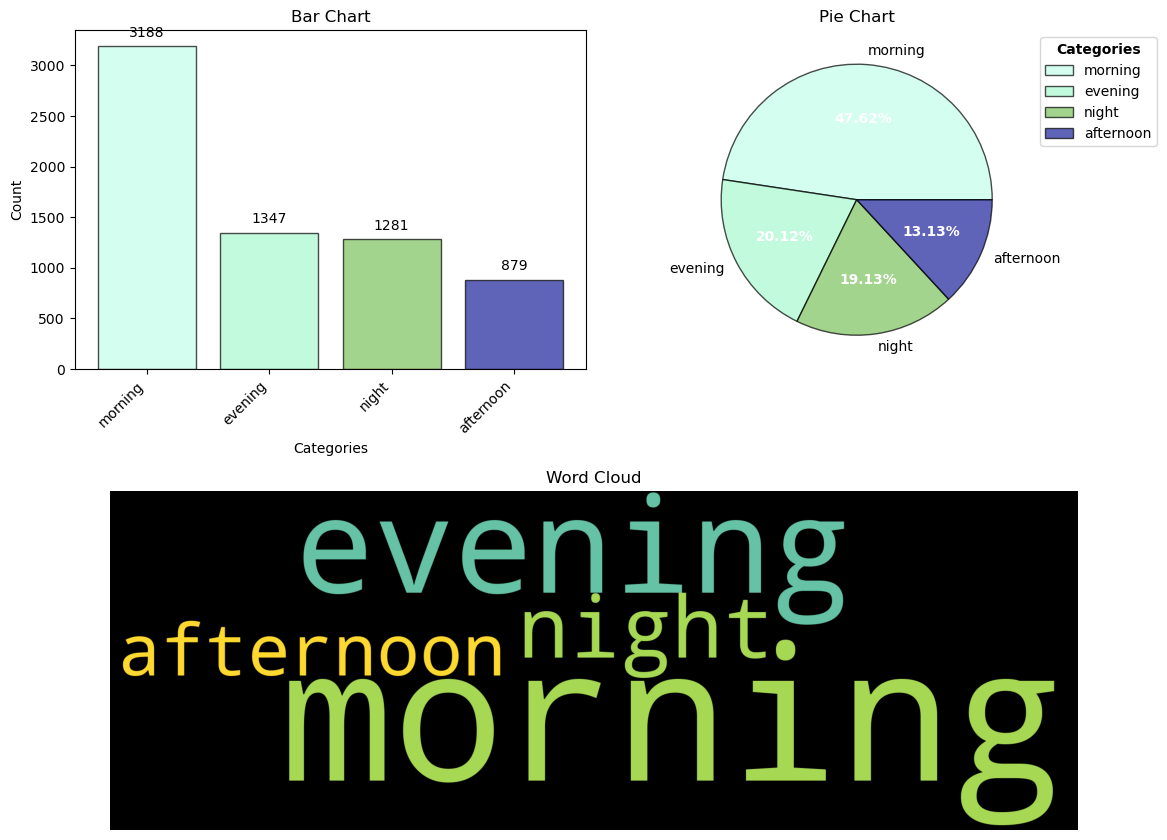

In [164]:
# Now we covert the hours informations into part of th dayabs
(
    train
    .assign(
        dep_time = lambda df_ : (
            np.select([df_.dep_time.dt.hour.between(4,12,inclusive = 'left'),
                       df_.dep_time.dt.hour.between(12,16,inclusive = 'left'),
                       df_.dep_time.dt.hour.between(16,20,inclusive = 'left')],
                      ['morning','afternoon','evening'],
                      default = 'night')
            
        )
    )
   .pipe(eda_helper_functions.cat_univar_plots,'dep_time')
)

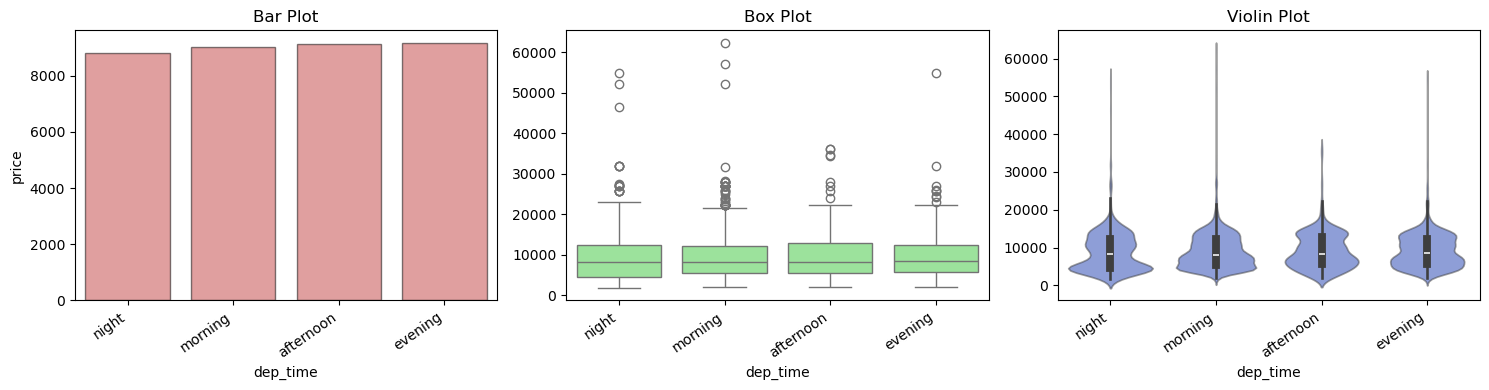

In [166]:
(
    train
    .assign(
        dep_time = lambda df_ : (
            np.select([df_.dep_time.dt.hour.between(4,12,inclusive = 'left'),
                       df_.dep_time.dt.hour.between(12,16,inclusive = 'left'),
                       df_.dep_time.dt.hour.between(16,20,inclusive = 'left')],
                      ['morning','afternoon','evening'],
                      default = 'night')
            
        )
    )
   .pipe(eda_helper_functions.num_cat_bivar_plots,'price','dep_time')
)

## duration column

In [170]:
eda_helper_functions.num_summary(train,'duration')

0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,510.0
75,922.5
90,1440.0
95,1601.5
99,1855.0


,value
mean,633.489171
trimmed mean (5%),599.711299
trimmed mean (10%),571.053761
median,510.000000


,value
var,253015.348516
std,503.006311
IQR,752.500000
mad,340.000000
coef_variance,0.794025


,value
skewness,0.893578
kurtosis,-0.053860


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 7.39934424543729e-57
Test Statistic       : 0.8865693123370929
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 248.46369663341648
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


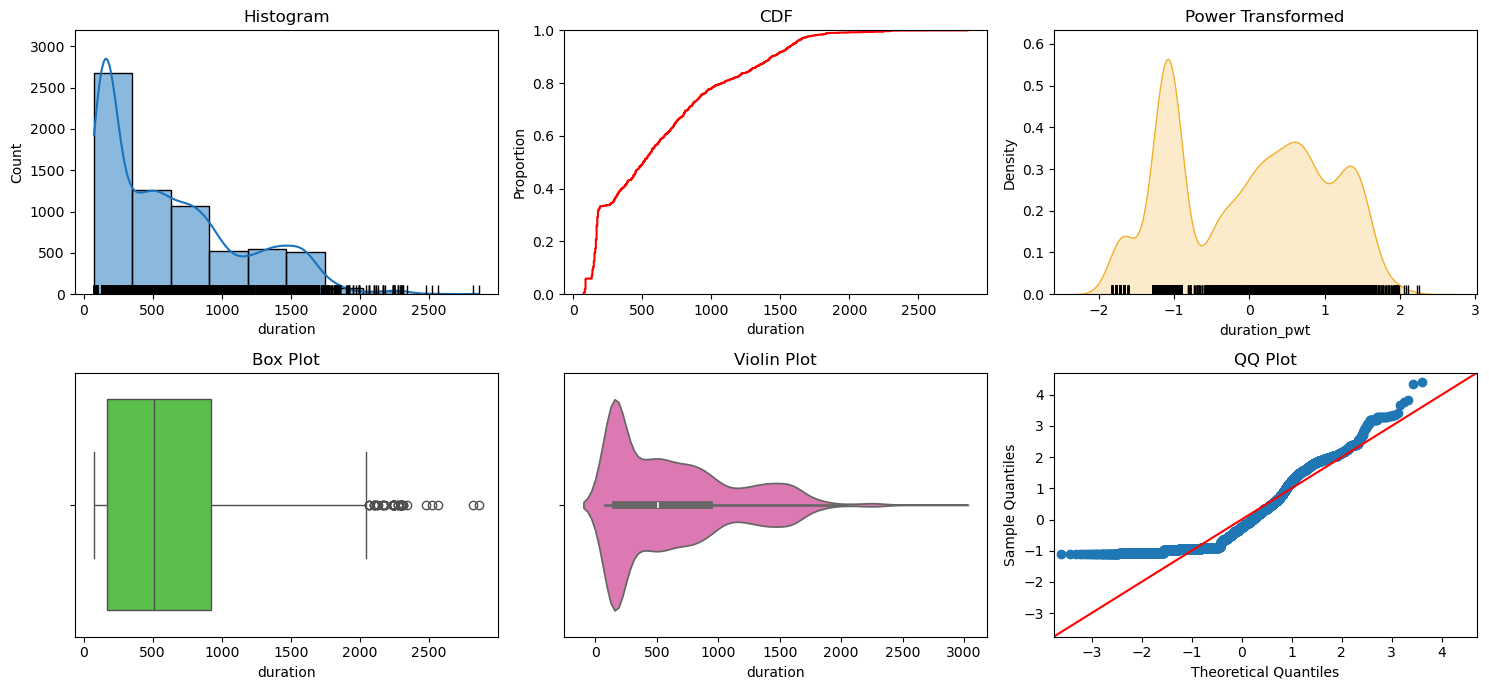

In [172]:
eda_helper_functions.num_univar_plots(train,'duration')

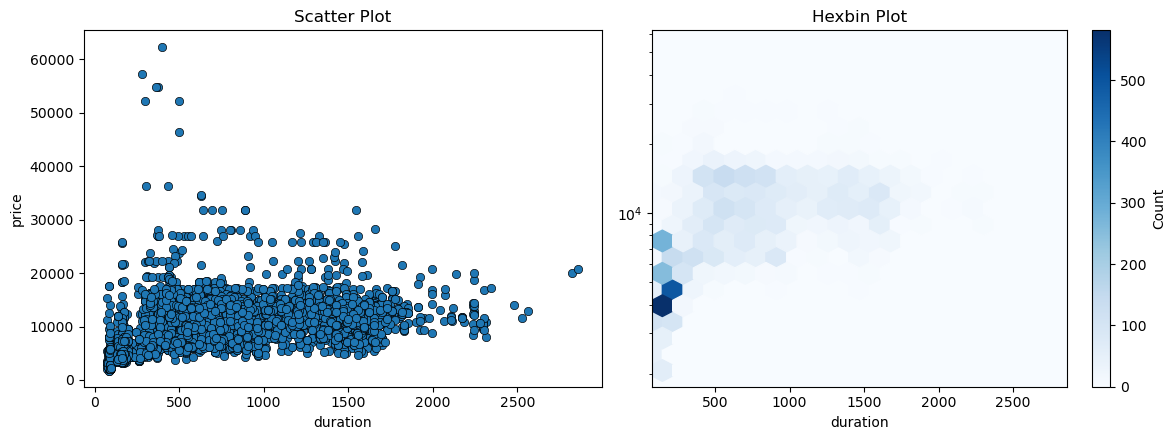

In [190]:
eda_helper_functions.num_bivar_plots(
    train,
    'duration',
    'price',
    hexbin_kwargs = dict(
        yscale = 'log',
        gridsize = 20,
        cmap = 'Blues'
    )
)

In [192]:
eda_helper_functions.num_num_hyp_testing(train,'duration','price')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.509012449177902
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6978600816697789
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables duration and price are correlated


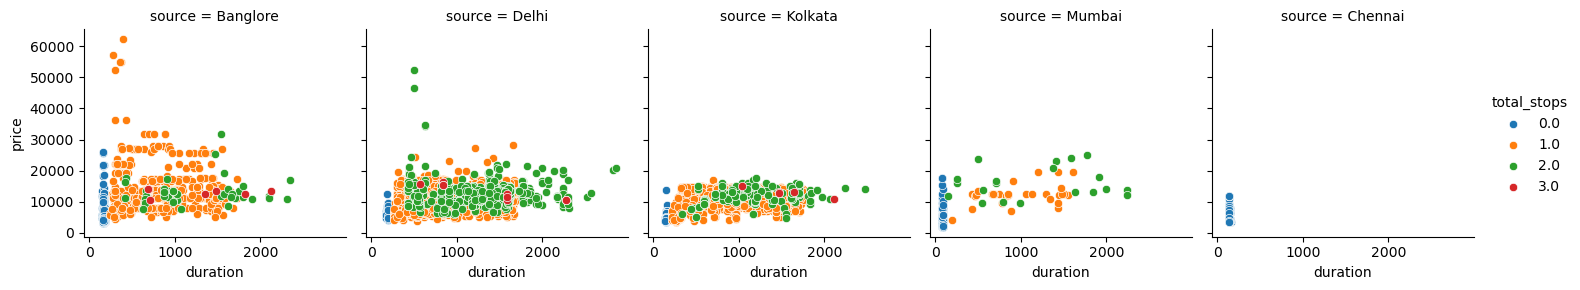

In [202]:
# Now we perform multi variate analysis on duration column we run facet gridab
duration_grid = sns.FacetGrid(
    data = train,
    col = 'source',
    hue = 'total_stops',
    sharey = True
)
duration_grid.map(sns.scatterplot,'duration','price')
duration_grid.add_legend()

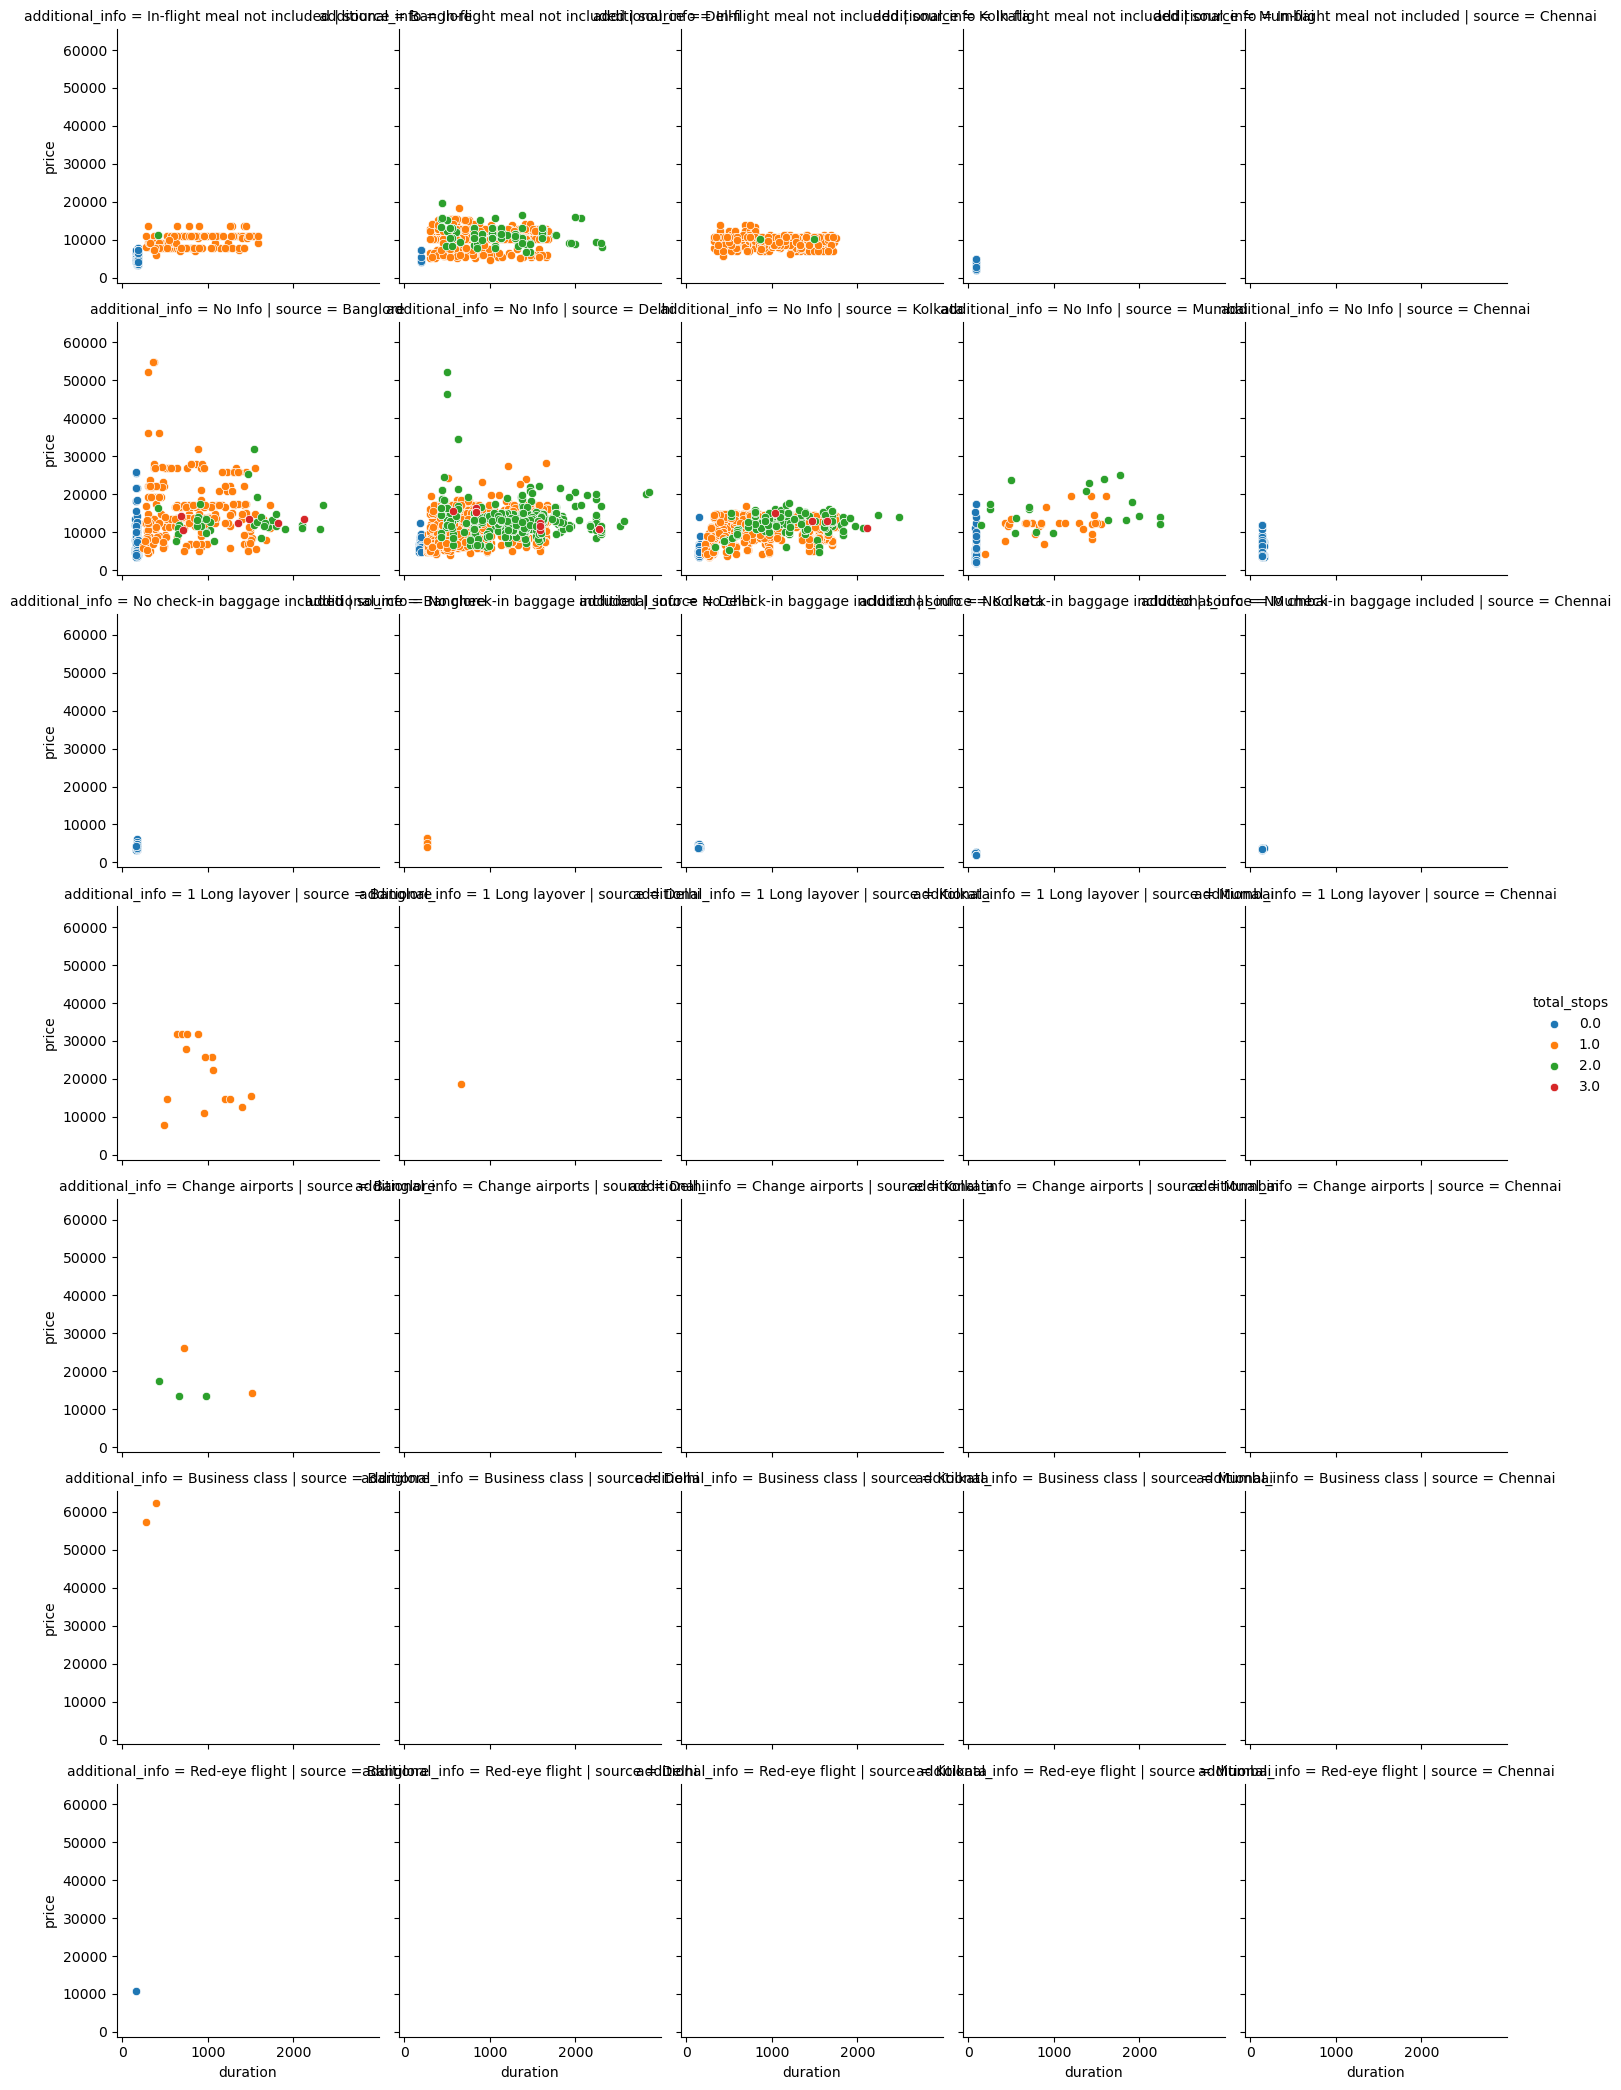

In [212]:
duration_grid = sns.FacetGrid(
    data = train,
    col = 'source',
    row = 'additional_info',
    hue = 'total_stops',
    
    sharey = True
)
duration_grid.map(sns.scatterplot,'duration','price')
duration_grid.add_legend()

In [240]:
eda_helper_functions.get_iqr_outliers(train,'duration')

Lower Limit : -958.75
Upper Limit : 2051.25


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
3690,Air India,2019-05-01,Kolkata,Banglore,2024-07-10 05:50:00,2024-07-10 16:15:00,2065,2.0,No Info,10991
6079,Jet Airways,2019-03-06,Delhi,Cochin,2024-07-10 17:55:00,2024-07-10 04:25:00,2070,2.0,No Info,17072
3225,Jet Airways,2019-03-06,Delhi,Cochin,2024-07-10 17:55:00,2024-07-10 04:25:00,2070,2.0,In-flight meal not included,15812
2990,Air India,2019-03-03,Banglore,New Delhi,2024-07-10 11:05:00,2024-07-10 22:10:00,2105,2.0,No Info,11791
4589,Air India,2019-03-18,Banglore,New Delhi,2024-07-10 11:05:00,2024-07-10 22:10:00,2105,2.0,No Info,11161
1517,Air India,2019-03-03,Banglore,New Delhi,2024-07-10 11:05:00,2024-07-10 22:10:00,2105,2.0,No Info,11948
2916,Air India,2019-05-12,Kolkata,Banglore,2024-07-10 12:00:00,2024-07-10 23:15:00,2115,3.0,No Info,10991
2170,Air India,2019-03-12,Banglore,New Delhi,2024-07-10 06:45:00,2024-07-10 18:05:00,2120,3.0,No Info,13387
1105,Jet Airways,2019-03-06,Delhi,Cochin,2024-07-10 16:50:00,2024-07-10 04:25:00,2135,2.0,No Info,19907
4000,Air India,2019-03-06,Delhi,Cochin,2024-07-10 07:05:00,2024-07-10 19:15:00,2170,2.0,No Info,11552


## additional_info column

In [243]:
eda_helper_functions.cat_summary(train,'additional_info')

0       In-flight meal not included
1       In-flight meal not included
2                           No Info
3                           No Info
4       In-flight meal not included
                   ...             
6690                        No Info
6691                        No Info
6692    In-flight meal not included
6693                        No Info
6694                 1 Long layover
Name: additional_info, Length: 6695, dtype: object

Data Type      : object
Cardinality    : 7 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,
count,6695
unique,7
top,No Info
freq,5249


,count,percentage
category,,
No Info,5249,0.784018
In-flight meal not included,1215,0.181479
No check-in baggage included,207,0.030919
1 Long layover,16,0.002390
Change airports,5,0.000747
Business class,2,0.000299
Red-eye flight,1,0.000149


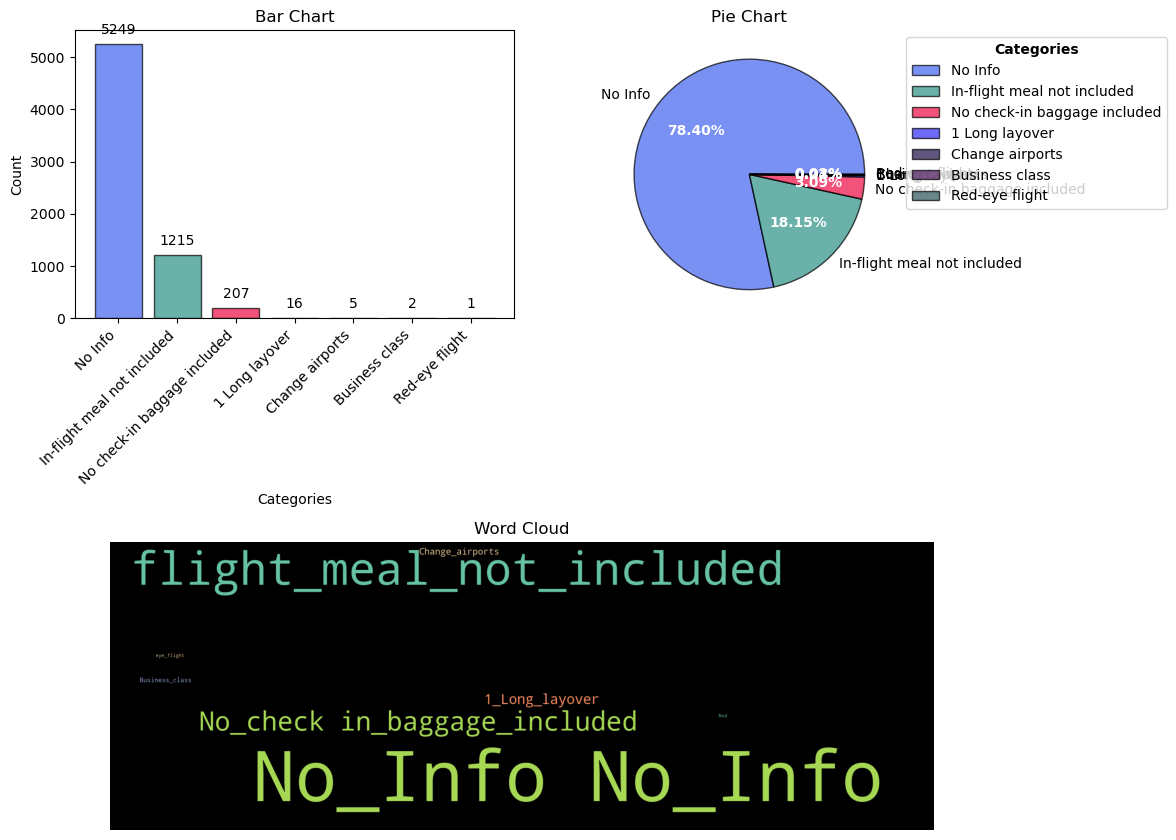

In [247]:
eda_helper_functions.cat_univar_plots(train,'additional_info')

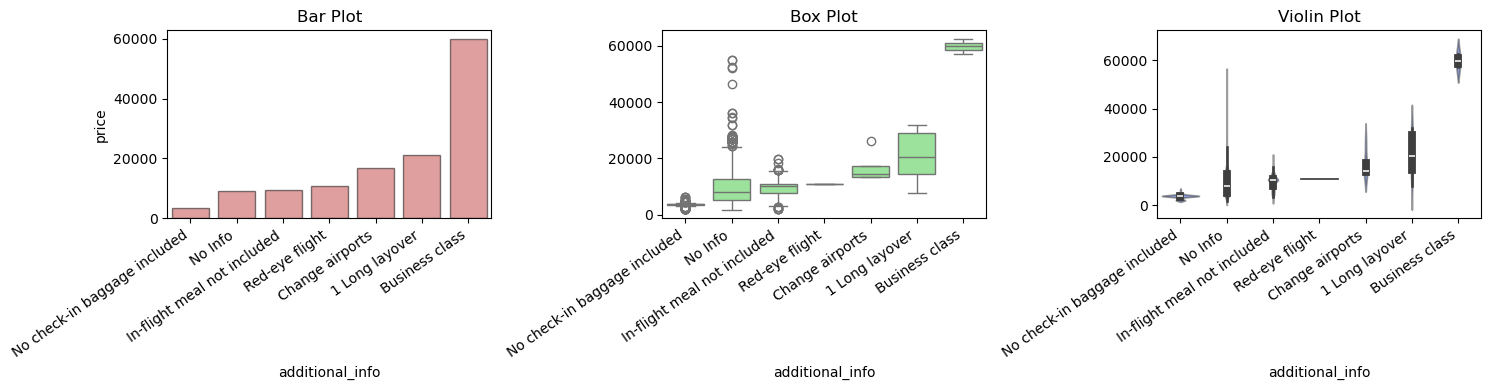

In [251]:
eda_helper_functions.num_cat_bivar_plots(train, "price", "additional_info")

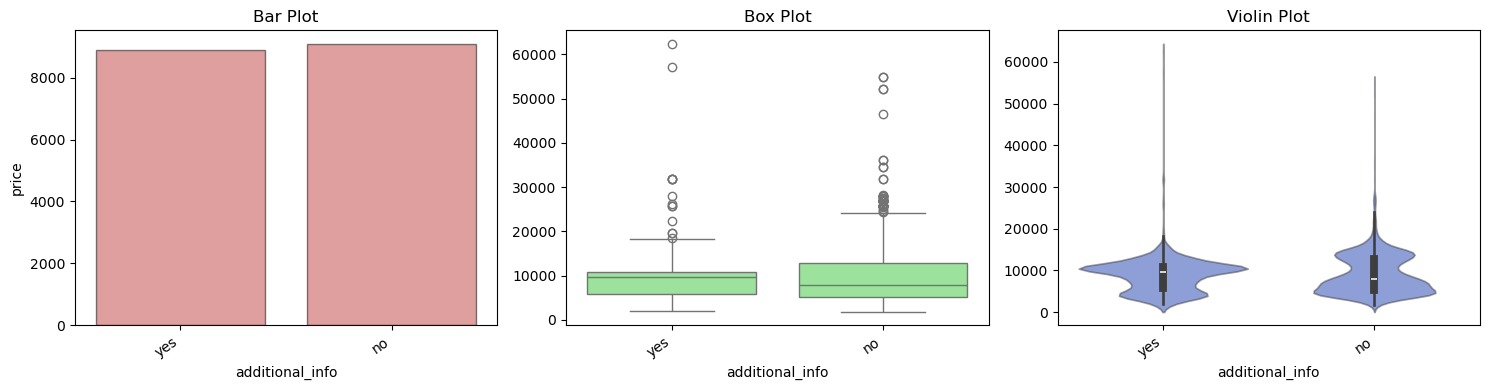

In [255]:
(
    train
    .assign(additional_info =(
        train
        .additional_info
        .pipe(lambda ser : np.where(ser.eq('No Info'),'no','yes'))
    ) )
    .pipe(eda_helper_functions.num_cat_bivar_plots,'price','additional_info')
)

## Automatd EDA

In [231]:
from ydata_profiling import ProfileReport

In [233]:
report = ProfileReport(train)

In [235]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [266]:
report.to_file(output_file="output.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]